Here I am visualizing the results of training and testing on Alibaba dataset

nodepiece_2

Better names are used in order to use these picture in the thesis

In [1]:
import pandas as pd
import time
import platform
import sys
import zipfile
from tqdm import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np

seed = 1234

In [2]:

# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = "All data/Testing Traces/topology_testing_traces.zip"
extract_dir = "All data/Testing Traces/topology_testing_traces"

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [3]:
topology_df = pd.read_csv("All data/Testing Traces/topology_testing_traces/topology_testing_traces/mean_trace_test_max.csv")
topology_df

,metric,common_neighbours,sorensen_index,salton_index,jaccard_index,resource_allocation,adamic_adar,katz_index,lhn_index
0,mrr,0.023059,0.023059,0.023059,0.023059,0.023059,0.023059,0.023059,0.023059
1,hits_at_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,hits_at_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,hits_at_5,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211
4,hits_at_10,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712


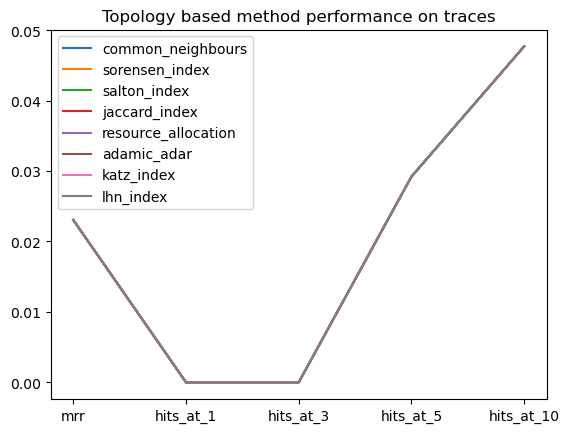

In [4]:
topology_df.plot()
x_values = topology_df['metric']
plt.xticks(np.arange(0,5), x_values)
plt.title("Topology based method performance on traces")
plt.show()

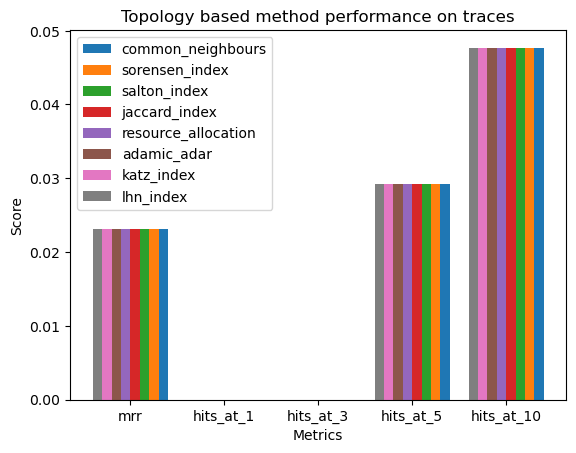

In [5]:
X_axis = np.arange(len(topology_df))+0.35
metrics = list(topology_df)[1:]
for i in range(len(metrics)):
    plt.bar(X_axis - 0.1*i,topology_df[metrics[i]], 0.1, label = metrics[i])
  
x_values = topology_df['metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Topology based method performance on traces")
plt.legend()
plt.show()

,Metric,Common Neighbours,Sorensen Index,Salton Index,Jaccard Index,Resource Allocation,Adamic Adar,Katz Index,LHN Index
0,MRR,0.019873,0.019873,0.019873,0.019873,0.019873,0.019873,0.019873,0.019873
1,Hits@1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Hits@3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Hits@5,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211
4,Hits@10,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712


C:\Users\gianl\AppData\Local\Temp\ipykernel_12496\2155218447.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(topology_df.T.to_latex( #hrules=True,


\begin{table}[ht!]
\centering
\caption{Topology-based methods' use-case performance on min policy.}
\label{tab:topology_use_case_min}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &  Hits@1 &  Hits@3 &    Hits@5 &   Hits@10 \\
Common Neighbours   &  0.019873 &     0.0 &     0.0 &  0.029211 &  0.047712 \\
Sorensen Index      &  0.019873 &     0.0 &     0.0 &  0.029211 &  0.047712 \\
Salton Index        &  0.019873 &     0.0 &     0.0 &  0.029211 &  0.047712 \\
Jaccard Index       &  0.019873 &     0.0 &     0.0 &  0.029211 &  0.047712 \\
Resource Allocation &  0.019873 &     0.0 &     0.0 &  0.029211 &  0.047712 \\
Adamic Adar         &  0.019873 &     0.0 &     0.0 &  0.029211 &  0.047712 \\
Katz Index          &  0.019873 &     0.0 &     0.0 &  0.029211 &  0.047712 \\
LHN Index           &  0.019873 &     0.0 &     0.0 &  0.029211 &  0.047712 \\
\bottomrule
\end{tabular}
\

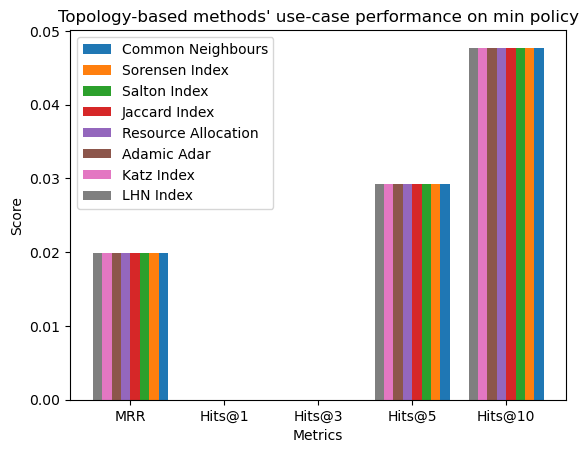

In [6]:
topology_df = pd.read_csv("All data/Testing Traces/topology_testing_traces/topology_testing_traces/mean_trace_test_min.csv")
topology_df.rename(columns={"common_neighbours": "Common Neighbours", "sorensen_index":"Sorensen Index",
                           "salton_index":"Salton Index", "jaccard_index":"Jaccard Index",
                           "resource_allocation":"Resource Allocation","adamic_adar":"Adamic Adar",
                           "katz_index":"Katz Index","lhn_index":"LHN Index","metric":"Metric"},inplace=True)
topology_df['Metric'] = ["MRR","Hits@1","Hits@3","Hits@5","Hits@10"]

display(topology_df)
print(topology_df.T.to_latex( #hrules=True,
                                   label = f'tab:topology_use_case_min',
                                   caption = f'Topology-based methods\' use-case performance on min policy.',
                                   #clines = "all;data",
                                   position="ht!",
                                   #position_float="centering",
                                   column_format="p{0.2\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth}",
#                                    index = True,
                                   header =False,
#                                    bold_rows=True
    ))
X_axis = np.arange(len(topology_df))+0.35
metrics = list(topology_df)[1:]
for i in range(len(metrics)):
    plt.bar(X_axis - 0.1*i,topology_df[metrics[i]], 0.1, label = metrics[i])
  
x_values = topology_df['Metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Topology-based methods' use-case performance on min policy")
plt.legend()
plt.show()

In [7]:

# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = "All data/Testing Traces/topology_connected_testing_traces.zip"
extract_dir = "All data/Testing Traces/topology_connected_testing_traces"

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [8]:
topology_connected_df = pd.read_csv("All data/Testing Traces/topology_connected_testing_traces/topology_connected_testing_traces/mean_trace_test_max.csv")
topology_connected_df

,metric,common_neighbours,sorensen_index,salton_index,jaccard_index,resource_allocation,adamic_adar,katz_index,lhn_index
0,mrr,0.037942,0.038857,0.038862,0.039355,0.143154,0.143153,0.137328,0.041754
1,hits_at_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,hits_at_3,0.034091,0.034091,0.034091,0.034091,0.128166,0.128166,0.115694,0.034091
3,hits_at_5,0.054545,0.054545,0.054545,0.056818,0.248808,0.248808,0.175986,0.056818
4,hits_at_10,0.067045,0.069318,0.069318,0.073864,0.325675,0.325675,0.273479,0.075000


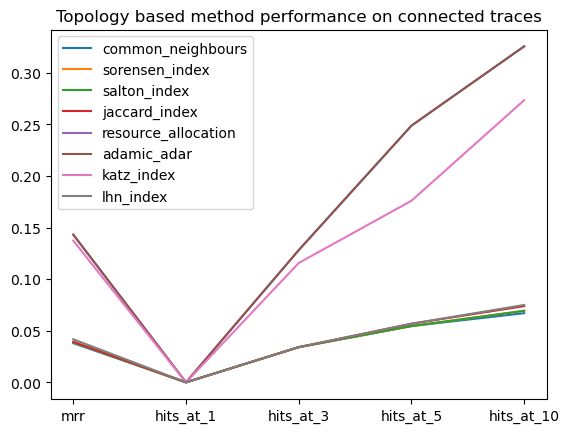

In [9]:
topology_connected_df.plot()
x_values = topology_connected_df['metric']
plt.xticks(np.arange(0,5), x_values)
plt.title("Topology based method performance on connected traces")
plt.show()

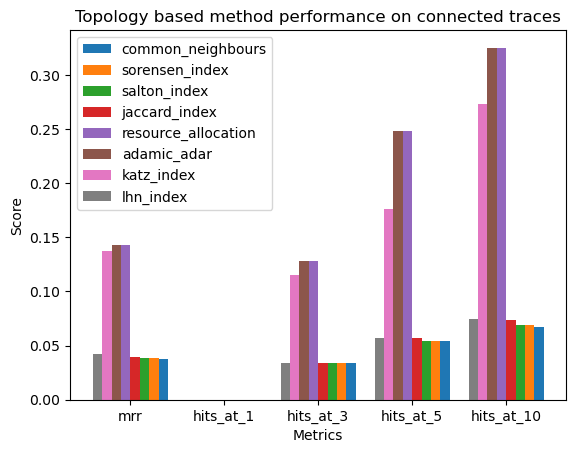

In [10]:
X_axis = np.arange(len(topology_connected_df))+0.35
metrics = list(topology_connected_df)[1:]
for i in range(len(metrics)):
    plt.bar(X_axis - 0.1*i,topology_connected_df[metrics[i]], 0.1, label = metrics[i])
  
x_values = topology_connected_df['metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Topology based method performance on connected traces")
plt.legend()
plt.show()

In [11]:
model_name_list = ['convE_transductive','tuckER_transductive','rotatE_transductive','rgcn_transductive','quatE_transductive',
                   'nodepiece_transductive_2']

In [12]:
for model_name in model_name_list:
    
    # specify the path to the zip file and the destination directory for the unzipped files
    zip_file_path = f'All data/Testing Traces/{model_name}_testing_traces.zip'
    extract_dir =f'All data/Testing Traces/{model_name}_testing_traces'

    # create a ZipFile object and extract all files to the destination directory
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)


In [13]:
traces_testing_df_list = []
for model_name in model_name_list:
    traces_testing_df_list.append(pd.read_csv(f'All data/Testing Traces/{model_name}_testing_traces/{model_name}_testing_traces/mean_trace_test_metrics.csv')
                                  .drop(columns=['pessimistic','realistic'],axis = 1).rename(columns={'Unnamed: 0':'metric','optimistic':model_name}))

In [14]:
traces_testing_df_list[0]

,metric,convE_transductive
0,inverse_harmonic_mean_rank,0.568130
1,hits_at_1,0.379935
2,hits_at_3,0.682953
3,hits_at_5,0.796821
4,hits_at_10,0.948251


In [15]:
traces_testing_df = traces_testing_df_list[0]
for i in range(1, len(traces_testing_df_list)):
    traces_testing_df = pd.merge(traces_testing_df,traces_testing_df_list[i],on='metric')

In [16]:
traces_testing_df

,metric,convE_transductive,tuckER_transductive,rotatE_transductive,rgcn_transductive,quatE_transductive,nodepiece_transductive_2
0,inverse_harmonic_mean_rank,0.568130,0.618457,0.758552,0.467251,0.765415,0.655864
1,hits_at_1,0.379935,0.419083,0.588092,0.257203,0.646847,0.490973
2,hits_at_3,0.682953,0.774699,0.924481,0.623348,0.873487,0.772039
3,hits_at_5,0.796821,0.894633,0.965060,0.739477,0.939147,0.898451
4,hits_at_10,0.948251,0.980055,0.989355,0.874131,0.970239,0.959573


C:\Users\gianl\AppData\Local\Temp\ipykernel_12496\163284778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


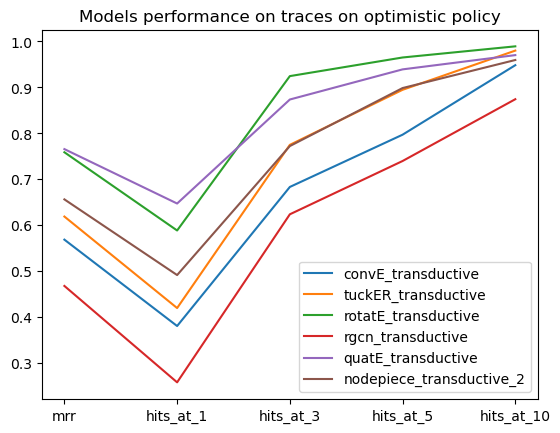

In [17]:
traces_testing_df.plot()
x_values = traces_testing_df['metric']
x_values[0] = 'mrr'
plt.xticks(np.arange(0,5), x_values)
plt.title("Models performance on traces on optimistic policy")
plt.show()

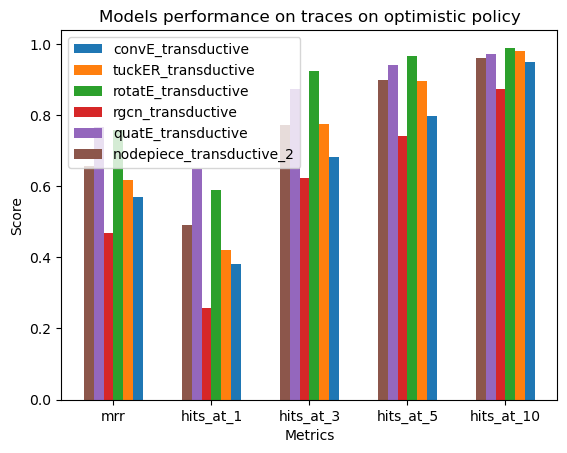

In [18]:
models = list(traces_testing_df)[1:]
X_axis = np.arange(len(traces_testing_df)) +0.25
for i in range(len(models)):
    plt.bar(X_axis - 0.1*i,traces_testing_df[models[i]], 0.1, label = models[i])
  
x_values = traces_testing_df['metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Models performance on traces on optimistic policy")
plt.legend()
plt.show()

In [19]:
# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = f'AnyBURL-23-1-sources/src/anyburl_testing_traces.zip'
extract_dir =f'AnyBURL-23-1-sources/src/anyburl_testing_traces'

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [20]:
# traces_testing_df = traces_testing_df.drop(index=3,axis=0) #dropping hits at 5
# anyburl = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_testing_traces/anyburl_testing_traces/trace_test.csv').drop(columns='Unnamed: 0',axis=1)
# anyburl_list = list(anyburl.mean())
# mrr = anyburl_list.pop()
# anyburl_list.insert(0,mrr)
# traces_testing_df['anyburl_10_transductive'] = anyburl_list
# models = list(traces_testing_df)[1:]
# X_axis = np.arange(len(traces_testing_df)) +0.25
# plt.figure(figsize=(8, 8))
# for i in range(len(models)):
#     plt.bar(X_axis - 0.1*i,traces_testing_df[models[i]], 0.1, label = models[i])
  
# x_values = traces_testing_df['metric']
# plt.xticks(np.arange(0,len(x_values)), x_values)
# plt.xlabel("Metrics")
# plt.ylabel("Score")
# plt.title("Models performance on traces on optimistic policy")
# plt.legend()
# plt.show()

In [21]:
# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = f'AnyBURL-23-1-sources/src/anyburl_pretrained_testing_traces.zip'
extract_dir =f'AnyBURL-23-1-sources/src/anyburl_pretrained_testing_traces'

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [22]:
traces_testing_df = traces_testing_df.drop(index=3,axis=0) #dropping hits at 5

,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,AnyBURL
0,MRR,0.568130,0.618457,0.758552,0.467251,0.765415,0.655864,0.569465
1,Hits@1,0.379935,0.419083,0.588092,0.257203,0.646847,0.490973,0.470575
2,Hits@3,0.682953,0.774699,0.924481,0.623348,0.873487,0.772039,0.590203
4,Hits@10,0.948251,0.980055,0.989355,0.874131,0.970239,0.959573,0.828518


\begin{table}[ht!]
\centering
\caption{Models' use-case performance on min policy.}
\label{tab:use_case_min}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric    &       MRR &    Hits@1 &    Hits@3 &   Hits@10 \\
ConvE     &   0.56813 &  0.379935 &  0.682953 &  0.948251 \\
TuckER    &  0.618457 &  0.419083 &  0.774699 &  0.980055 \\
RotatE    &  0.758552 &  0.588092 &  0.924481 &  0.989355 \\
R-GCN     &  0.467251 &  0.257203 &  0.623348 &  0.874131 \\
QuatE     &  0.765415 &  0.646847 &  0.873487 &  0.970239 \\
NodePiece &  0.655864 &  0.490973 &  0.772039 &  0.959573 \\
AnyBURL   &  0.569465 &  0.470575 &  0.590203 &  0.828518 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\gianl\AppData\Local\Temp\ipykernel_12496\915098769.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(traces_testing_df.T.to_latex( #hrules=True,


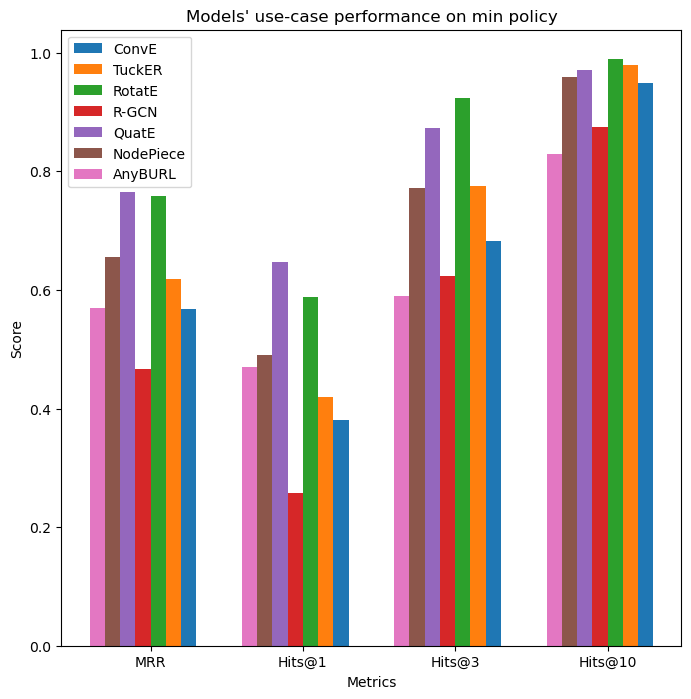

In [23]:
anyburl = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_pretrained_testing_traces/anyburl_pretrained_testing_traces/trace_test.csv').drop(columns='Unnamed: 0',axis=1)
anyburl_list = list(anyburl.mean())
mrr = anyburl_list.pop()
anyburl_list.insert(0,mrr)
traces_testing_df['anyburl_100_pretrained_transductive'] = anyburl_list
traces_testing_df['metric'] = ["MRR","Hits@1","Hits@3","Hits@10"]
column_dict = {'convE_transductive': "ConvE", "tuckER_transductive":"TuckER", "rotatE_transductive":"RotatE",
                  "rgcn_transductive":"R-GCN","quatE_transductive":"QuatE","nodepiece_transductive_2":"NodePiece",
                  "nodepiece_inductive_2":"NodePiece Inductive","anyburl_100_transductive":"AnyBURL",
                  'metric':"Metric","anyburl_100_pretrained_transductive":"AnyBURL"}
traces_testing_df.rename(columns=column_dict,inplace=True)
display(traces_testing_df)
print(traces_testing_df.T.to_latex( #hrules=True,
                                   label = f'tab:use_case_min',
                                   caption = f'Models\' use-case performance on min policy.',
                                   #clines = "all;data",
                                   position="ht!",
                                   #position_float="centering",
                                   column_format="p{0.2\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth}",
#                                    index = True,
                                   header =False,
#                                    bold_rows=True
    )
                                   )
models = list(traces_testing_df)[1:]
X_axis = np.arange(len(traces_testing_df)) +0.25
plt.figure(figsize=(8, 8))
for i in range(len(models)):
    plt.bar(X_axis - 0.1*i,traces_testing_df[models[i]], 0.1, label = models[i])
  
x_values = traces_testing_df['Metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Models' use-case performance on min policy")
plt.legend()
plt.show()

In [24]:
model_name_list = ['convE_transductive','tuckER_transductive','rotatE_transductive','rgcn_transductive','quatE_transductive',
                   'nodepiece_transductive_2','nodepiece_inductive_2']
for model_name in model_name_list:
    
    # specify the path to the zip file and the destination directory for the unzipped files
    zip_file_path = f'All data/{model_name}.zip'
    extract_dir =f'All data/{model_name}'

    # create a ZipFile object and extract all files to the destination directory
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

In [25]:
# def plot_test(pred_type,policy):
#     policies = ['optimistic', 'realistic','pessimistic']
#     policies.remove(policy)
#     testing_df_list = []
#     for model_name in model_name_list:
#         testing_df_list.append(pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_test_metrics_{pred_type}.csv')
#                                      .drop(columns=policies,axis = 1).rename(columns={'Unnamed: 0':'metric',policy:model_name}))
#     testing_df = testing_df_list[0]
#     for i in range(1, len(testing_df_list)):
#         testing_df = pd.merge(testing_df,testing_df_list[i],on='metric')
# #     testing_df.plot()
# #     x_values = testing_df['metric']
# #     x_values[0] = 'mrr'
# #     plt.xticks(np.arange(0,5), x_values)
# #     plt.title(f'Models performance on {pred_type} prediction on {policy} policy')
# #     plt.show()
    
    
#     models = list(testing_df)[1:]
#     X_axis = np.arange(len(testing_df)) +0.25
#     for i in range(len(models)):
#         plt.bar(X_axis - 0.1*i,testing_df[models[i]], 0.1, label = models[i])

#     x_values = testing_df['metric']
#     x_values[0] = 'mrr'

#     plt.xticks(np.arange(0,len(x_values)), x_values)
#     plt.xlabel("Metrics")
#     plt.ylabel("Score")
#     plt.title(f'Models performance on {pred_type} prediction on {policy} policy')
#     plt.legend()

#     plt.show()

In [26]:
# for pred_type in ['head','tail','both']:
#     for policy in ['optimistic', 'realistic','pessimistic']:
#         plot_test(pred_type,policy)

In [27]:
def plot_information(information):
#     columns = [
# #         'device', 'parameters bytes','number parameters', 'training duration','training evaluation duration',
# #               'validation evaluation duration','testing evaluation duration','Operating system name',
# #               'Operating system version','Processor architecture','Python version','Processor model name',
# #               'Number cpu cores','Total physical memory','GPU','loss','embedding_dim','learning_rate','optimizer',
#                 'num_epochs','patience'
#               ]
#     columns.remove(information)
    information_df_list = []
    for model_name in model_name_list:
        temp_df = pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
    
    temp_df = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl_information.csv')
    temp_df = temp_df[temp_df['name']==information].rename(columns={'value':'anyburl'}).drop(columns=['Unnamed: 0'],axis=1)
    information_df_list.append(temp_df)
    information_df = information_df_list[0]
    
    for i in range(1, len(information_df_list)):
        information_df = pd.merge(information_df,information_df_list[i],on='name')
    information_df = information_df.drop(columns=['name'],axis=1)
    names = list(information_df)
    information_df = information_df.transpose()
    column = list(information_df)[0]
    information_df = information_df.rename(columns={column:information})
    information_df[information]=information_df[information].astype(float)
#     for elem in names:
#         information_df[elem] = information_df[elem].astype(float)
#     information_df=np.log(information_df)
    display(information_df)
#     information_df.plot()
    plt.bar(names,list(information_df[information]))
#     plt.plot(list(information_df.loc[0]))
#     plt.hist(list(information_df.loc[0]))
    x_values =names
    plt.xticks(np.arange(0,len(x_values)), x_values, rotation=90)
    plt.title(f'Models {information}')
    plt.show()
    

In [28]:
# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = f'AnyBURL-23-1-sources/src/anyburl_entire_graph.zip'
extract_dir =f'AnyBURL-23-1-sources/src/anyburl_entire_graph'

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

,parameters bytes
convE_transductive,2.170017e+07
tuckER_transductive,4.533360e+07
rotatE_transductive,2.666080e+07
rgcn_transductive,1.557229e+07
quatE_transductive,5.332160e+07
nodepiece_transductive_2,9.728000e+05
nodepiece_inductive_2,6.732800e+06
anyburl,1.000000e+09


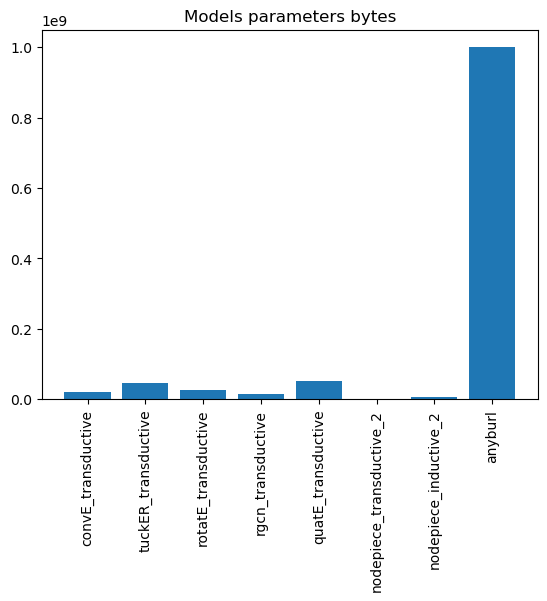

,number parameters
convE_transductive,5425043.0
tuckER_transductive,11333400.0
rotatE_transductive,6665200.0
rgcn_transductive,3893072.0
quatE_transductive,13330400.0
nodepiece_transductive_2,243200.0
nodepiece_inductive_2,1683200.0
anyburl,377728.0


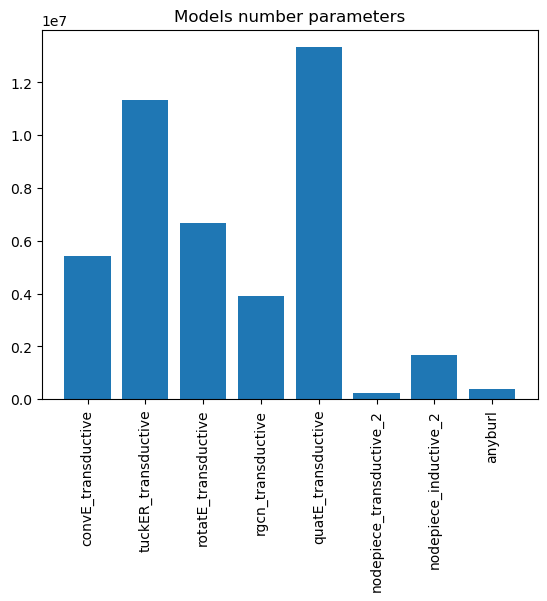

,training duration
convE_transductive,152.307357
tuckER_transductive,2184.641061
rotatE_transductive,1083.521330
rgcn_transductive,162.562170
quatE_transductive,5897.180882
nodepiece_transductive_2,249.551234
nodepiece_inductive_2,72.856738
anyburl,100.000000


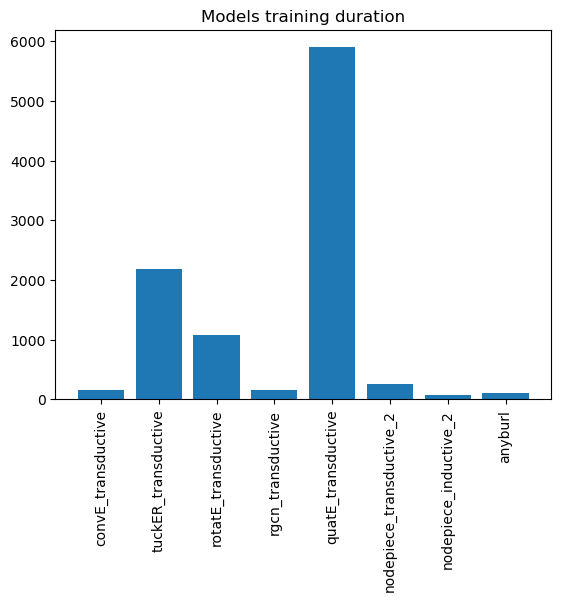

,testing evaluation duration
convE_transductive,3.743608
tuckER_transductive,15.446498
rotatE_transductive,9.931920
rgcn_transductive,6.276913
quatE_transductive,73.281976
nodepiece_transductive_2,6.582701
nodepiece_inductive_2,1.217404
anyburl,53.595100


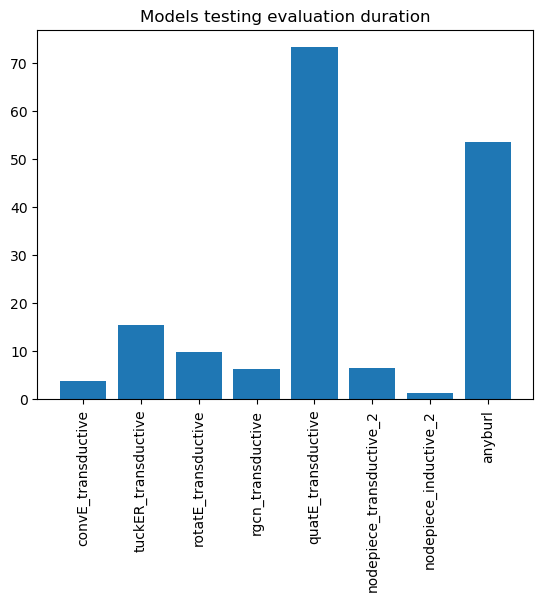

In [29]:
for information in['parameters bytes','number parameters', 'training duration','testing evaluation duration']:
    plot_information(information)

In [30]:
# policy = "pessimistic"
# pred_type = "tail"
# policies = ['optimistic', 'realistic','pessimistic']
# policies.remove(policy)
# testing_df_list = []
# for model_name in model_name_list:
#     testing_df_list.append(pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_test_metrics_{pred_type}.csv')
#                                      .drop(columns=policies,axis = 1).rename(columns={'Unnamed: 0':'metric',policy:model_name}))
# # testing_df_list.append(pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl.csv').drop(columns='Unnamed: 0',axis=1))
# testing_df = testing_df_list[0]
# for i in range(1, len(testing_df_list)):
#     testing_df = pd.merge(testing_df,testing_df_list[i],on='metric')

# testing_df = testing_df.drop(index=3,axis=0) #dropping hits at 5
# anyburl = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl.csv').drop(columns='Unnamed: 0',axis=1)
# anyburl_list = list(anyburl.iloc[0])
# mrr = anyburl_list.pop()
# anyburl_list.insert(0,mrr)
# # model_name_list.append('anyburl')
# testing_df['anyburl_100_transductive'] = anyburl_list
# display(testing_df)
# models = list(testing_df)[1:]
# X_axis = np.arange(len(testing_df)) +0.25
# plt.figure(figsize=(8, 8))

# for i in range(len(models)):
#     plt.bar(X_axis - 0.1*i,testing_df[models[i]], 0.1, label = models[i])

# x_values = testing_df['metric']
# x_values[0] = 'mrr'
# plt.xticks(np.arange(0,len(x_values)), x_values)
# plt.xlabel("Metrics")
# plt.ylabel("Score")
# plt.title(f'Models performance on {pred_type} prediction on {policy} policy')
# plt.legend()
# plt.show()

In [41]:
def plot_test_2(pred_type,policy):
    policies = ['optimistic', 'realistic','pessimistic']
    policies.remove(policy)
    testing_df_list = []
    for model_name in model_name_list:
        testing_df_list.append(pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_test_metrics_{pred_type}.csv')
                                         .drop(columns=policies,axis = 1).rename(columns={'Unnamed: 0':'metric',policy:model_name}))
    # testing_df_list.append(pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl.csv').drop(columns='Unnamed: 0',axis=1))
    testing_df = testing_df_list[0]
    for i in range(1, len(testing_df_list)):
        testing_df = pd.merge(testing_df,testing_df_list[i],on='metric')
        
    column_format="p{0.2\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth}"
    if pred_type == "both" and policy == "optimistic":
        testing_df = testing_df.drop(index=3,axis=0) #dropping hits at 5
        anyburl = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl.csv').drop(columns='Unnamed: 0',axis=1)
        anyburl_list = list(anyburl.iloc[0])
        mrr = anyburl_list.pop()
        anyburl_list.insert(0,mrr)
        # model_name_list.append('anyburl')
        testing_df['anyburl_100_transductive'] = anyburl_list
        testing_df['metric'] = ["MRR","Hits@1","Hits@3","Hits@10"]
#         column_format="p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.04\\textwidth}"
        column_format="p{0.2\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth}"
    else:
        testing_df['metric'] = ["MRR","Hits@1","Hits@3","Hits@5","Hits@10"]
        
    column_dict = {'convE_transductive': "ConvE", "tuckER_transductive":"TuckER", "rotatE_transductive":"RotatE",
                  "rgcn_transductive":"R-GCN","quatE_transductive":"QuatE","nodepiece_transductive_2":"NodePiece",
                  "nodepiece_inductive_2":"NodePiece Inductive","anyburl_100_transductive":"AnyBURL",
                  'metric':"Metric"}
    testing_df.rename(columns=column_dict,inplace=True)
    display(testing_df)
    
    models = list(testing_df)[1:]
    X_axis = np.arange(len(testing_df)) +0.25
    plt.figure(figsize=(4, 8))

    for i in range(len(models)):
        plt.bar(X_axis - 0.1*i,testing_df[models[i]], 0.1, label = models[i])

    x_values = testing_df['Metric']
#     x_values[0] = 'mrr'
    plt.xticks(np.arange(0,len(x_values)), x_values)
    plt.xlabel("Metrics")
    plt.ylabel("Score")
    policydict = {'optimistic':"min", 'realistic':"average",'pessimistic':"max"}
#     plt.title(f'Models\' {pred_type} prediction performance on {policydict[policy]} policy')
    plt.legend()
    plt.show()
    testing_df =testing_df.reset_index(drop=True)
    print(testing_df.T.to_latex( #hrules=True,
                                   label = f'tab:classic_{pred_type}_{policydict[policy]}',
                                   caption = f'Models\' {pred_type} prediction performance on {policydict[policy]} policy.',
                                   #clines = "all;data",
                                   position="ht!",
                                   #position_float="centering",
                                   column_format=column_format,
#                                    index = True,
                                   header =False,
#                                    bold_rows=True
    )
                                   )

,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.035839,0.116845,0.341663,0.047420,0.069786,0.655206,0.689833
1,Hits@1,0.009284,0.059900,0.239600,0.027674,0.035976,0.652116,0.681156
2,Hits@3,0.032673,0.120336,0.375558,0.048831,0.074719,0.655151,0.690452
3,Hits@5,0.050616,0.164078,0.448581,0.061775,0.095251,0.655597,0.692211
4,Hits@10,0.083467,0.236297,0.545885,0.086145,0.131851,0.657650,0.698241


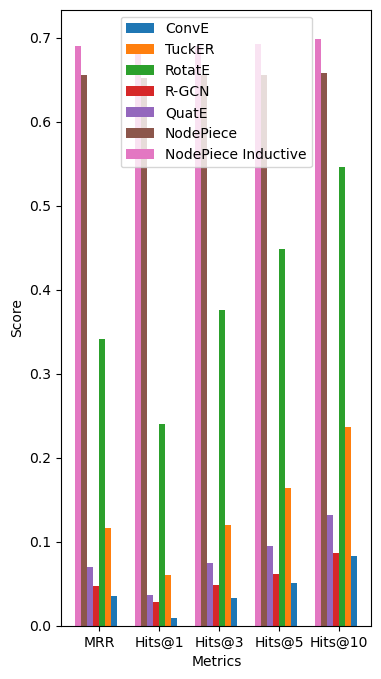

\begin{table}[ht!]
\centering
\caption{Models' head prediction performance on min policy.}
\label{tab:classic_head_min}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.035839 &  0.009284 &  0.032673 &  0.050616 &  0.083467 \\
TuckER              &  0.116845 &    0.0599 &  0.120336 &  0.164078 &  0.236297 \\
RotatE              &  0.341663 &    0.2396 &  0.375558 &  0.448581 &  0.545885 \\
R-GCN               &   0.04742 &  0.027674 &  0.048831 &  0.061775 &  0.086145 \\
QuatE               &  0.069786 &  0.035976 &  0.074719 &  0.095251 &  0.131851 \\
NodePiece           &  0.655206 &  0.652116 &  0.655151 &  0.655597 &   0.65765 \\
NodePiece Inductive &  0.689833 &  0.681156 &  0.690452 &  0.692211 &  0.698241 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\gianl\AppData\Local\Temp\ipykernel_12496\1786581200.py:52: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.035839,0.116845,0.341663,0.047420,0.069786,0.003257,0.013618
1,Hits@1,0.009284,0.059900,0.239600,0.027674,0.035976,0.000357,0.003015
2,Hits@3,0.032673,0.120336,0.375558,0.048831,0.074719,0.001875,0.011809
3,Hits@5,0.050616,0.164078,0.448581,0.061775,0.095251,0.001964,0.015327
4,Hits@10,0.083467,0.236297,0.545885,0.086145,0.131851,0.004374,0.024372


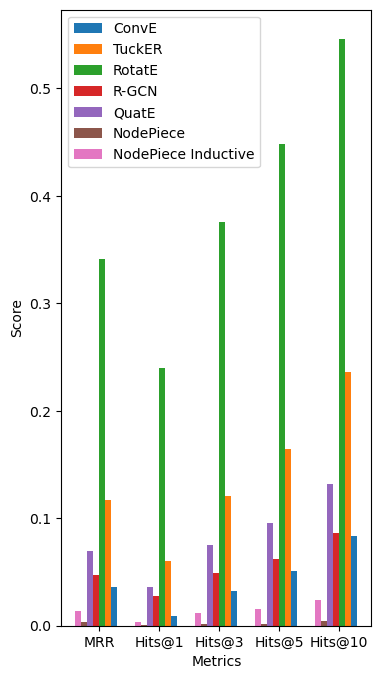

\begin{table}[ht!]
\centering
\caption{Models' head prediction performance on average policy.}
\label{tab:classic_head_average}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.035839 &  0.009284 &  0.032673 &  0.050616 &  0.083467 \\
TuckER              &  0.116845 &    0.0599 &  0.120336 &  0.164078 &  0.236297 \\
RotatE              &  0.341663 &    0.2396 &  0.375558 &  0.448581 &  0.545885 \\
R-GCN               &   0.04742 &  0.027674 &  0.048831 &  0.061775 &  0.086145 \\
QuatE               &  0.069786 &  0.035976 &  0.074719 &  0.095251 &  0.131851 \\
NodePiece           &  0.003257 &  0.000357 &  0.001875 &  0.001964 &  0.004374 \\
NodePiece Inductive &  0.013618 &  0.003015 &  0.011809 &  0.015327 &  0.024372 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\gianl\AppData\Local\Temp\ipykernel_12496\1786581200.py:52: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.035839,0.116845,0.341663,0.047420,0.069786,0.002442,0.012160
1,Hits@1,0.009284,0.059900,0.239600,0.027674,0.035976,0.000357,0.003015
2,Hits@3,0.032673,0.120336,0.375558,0.048831,0.074719,0.001339,0.011809
3,Hits@5,0.050616,0.164078,0.448581,0.061775,0.095251,0.001875,0.013317
4,Hits@10,0.083467,0.236297,0.545885,0.086145,0.131851,0.002500,0.021608


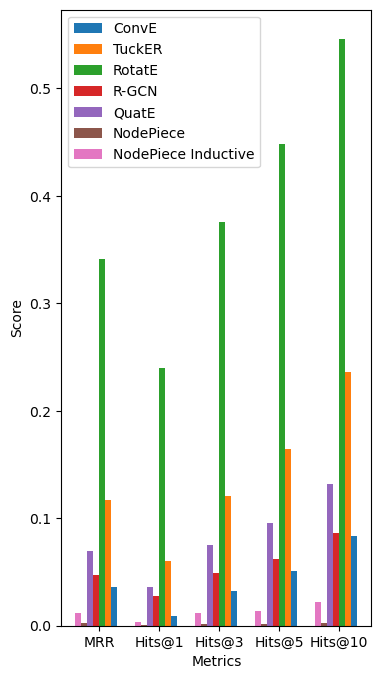

\begin{table}[ht!]
\centering
\caption{Models' head prediction performance on max policy.}
\label{tab:classic_head_max}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.035839 &  0.009284 &  0.032673 &  0.050616 &  0.083467 \\
TuckER              &  0.116845 &    0.0599 &  0.120336 &  0.164078 &  0.236297 \\
RotatE              &  0.341663 &    0.2396 &  0.375558 &  0.448581 &  0.545885 \\
R-GCN               &   0.04742 &  0.027674 &  0.048831 &  0.061775 &  0.086145 \\
QuatE               &  0.069786 &  0.035976 &  0.074719 &  0.095251 &  0.131851 \\
NodePiece           &  0.002442 &  0.000357 &  0.001339 &  0.001875 &    0.0025 \\
NodePiece Inductive &   0.01216 &  0.003015 &  0.011809 &  0.013317 &  0.021608 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\gianl\AppData\Local\Temp\ipykernel_12496\1786581200.py:52: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.090014,0.229754,0.469115,0.011751,0.173272,0.061445,0.064085
1,Hits@1,0.038654,0.138904,0.370112,0.004374,0.116319,0.049813,0.040955
2,Hits@3,0.092751,0.281646,0.531066,0.011069,0.194697,0.062757,0.063317
3,Hits@5,0.127567,0.339136,0.583467,0.015087,0.229691,0.063292,0.068844
4,Hits@10,0.188091,0.396269,0.639618,0.022764,0.277272,0.079986,0.090201


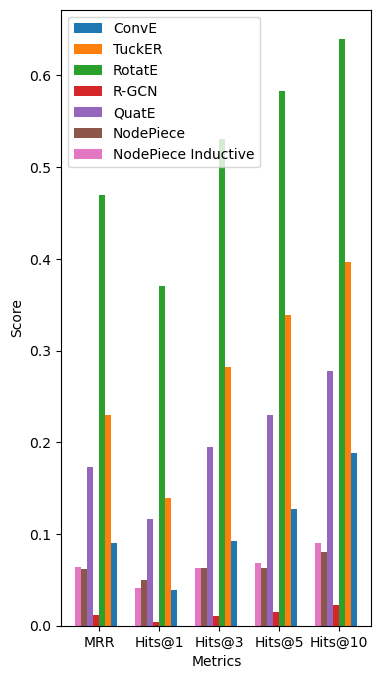

\begin{table}[ht!]
\centering
\caption{Models' tail prediction performance on min policy.}
\label{tab:classic_tail_min}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.090014 &  0.038654 &  0.092751 &  0.127567 &  0.188091 \\
TuckER              &  0.229754 &  0.138904 &  0.281646 &  0.339136 &  0.396269 \\
RotatE              &  0.469115 &  0.370112 &  0.531066 &  0.583467 &  0.639618 \\
R-GCN               &  0.011751 &  0.004374 &  0.011069 &  0.015087 &  0.022764 \\
QuatE               &  0.173272 &  0.116319 &  0.194697 &  0.229691 &  0.277272 \\
NodePiece           &  0.061445 &  0.049813 &  0.062757 &  0.063292 &  0.079986 \\
NodePiece Inductive &  0.064085 &  0.040955 &  0.063317 &  0.068844 &  0.090201 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\gianl\AppData\Local\Temp\ipykernel_12496\1786581200.py:52: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.090014,0.229754,0.469115,0.011751,0.173272,0.007882,0.046283
1,Hits@1,0.038654,0.138904,0.370112,0.004374,0.116319,0.000357,0.021357
2,Hits@3,0.092751,0.281646,0.531066,0.011069,0.194697,0.000982,0.037186
3,Hits@5,0.127567,0.339136,0.583467,0.015087,0.229691,0.013033,0.057286
4,Hits@10,0.188091,0.396269,0.639618,0.022764,0.277272,0.014105,0.074372


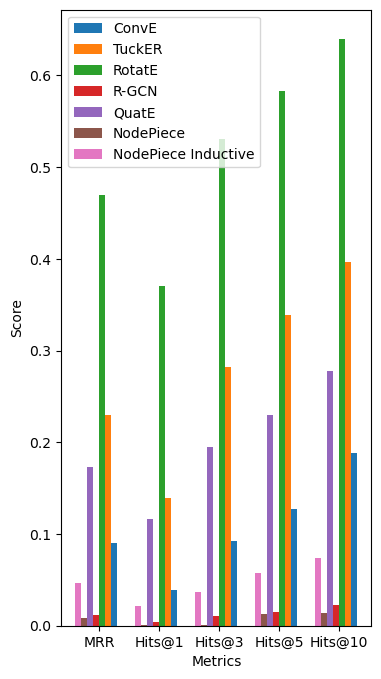

\begin{table}[ht!]
\centering
\caption{Models' tail prediction performance on average policy.}
\label{tab:classic_tail_average}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.090014 &  0.038654 &  0.092751 &  0.127567 &  0.188091 \\
TuckER              &  0.229754 &  0.138904 &  0.281646 &  0.339136 &  0.396269 \\
RotatE              &  0.469115 &  0.370112 &  0.531066 &  0.583467 &  0.639618 \\
R-GCN               &  0.011751 &  0.004374 &  0.011069 &  0.015087 &  0.022764 \\
QuatE               &  0.173272 &  0.116319 &  0.194697 &  0.229691 &  0.277272 \\
NodePiece           &  0.007882 &  0.000357 &  0.000982 &  0.013033 &  0.014105 \\
NodePiece Inductive &  0.046283 &  0.021357 &  0.037186 &  0.057286 &  0.074372 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\gianl\AppData\Local\Temp\ipykernel_12496\1786581200.py:52: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.090014,0.229754,0.469115,0.011751,0.173272,0.005513,0.043638
1,Hits@1,0.038654,0.138904,0.370112,0.004374,0.116319,0.000357,0.021357
2,Hits@3,0.092751,0.281646,0.531066,0.011069,0.194697,0.000625,0.036683
3,Hits@5,0.127567,0.339136,0.583467,0.015087,0.229691,0.001161,0.042211
4,Hits@10,0.188091,0.396269,0.639618,0.022764,0.277272,0.013480,0.068593


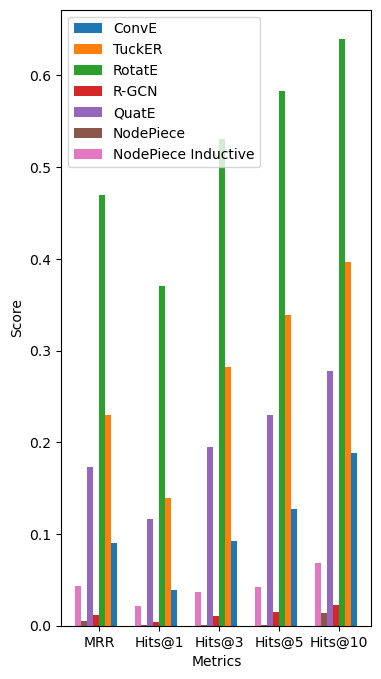

\begin{table}[ht!]
\centering
\caption{Models' tail prediction performance on max policy.}
\label{tab:classic_tail_max}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.090014 &  0.038654 &  0.092751 &  0.127567 &  0.188091 \\
TuckER              &  0.229754 &  0.138904 &  0.281646 &  0.339136 &  0.396269 \\
RotatE              &  0.469115 &  0.370112 &  0.531066 &  0.583467 &  0.639618 \\
R-GCN               &  0.011751 &  0.004374 &  0.011069 &  0.015087 &  0.022764 \\
QuatE               &  0.173272 &  0.116319 &  0.194697 &  0.229691 &  0.277272 \\
NodePiece           &  0.005513 &  0.000357 &  0.000625 &  0.001161 &   0.01348 \\
NodePiece Inductive &  0.043638 &  0.021357 &  0.036683 &  0.042211 &  0.068593 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\gianl\AppData\Local\Temp\ipykernel_12496\1786581200.py:52: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive,AnyBURL
0,MRR,0.062926,0.173300,0.405389,0.029585,0.121529,0.358326,0.376959,0.4355
1,Hits@1,0.023969,0.099402,0.304856,0.016024,0.076147,0.350964,0.361055,0.3523
2,Hits@3,0.062712,0.200991,0.453312,0.029950,0.134708,0.358954,0.376884,0.4705
4,Hits@10,0.135779,0.316283,0.592751,0.054455,0.204562,0.368818,0.394221,0.6037


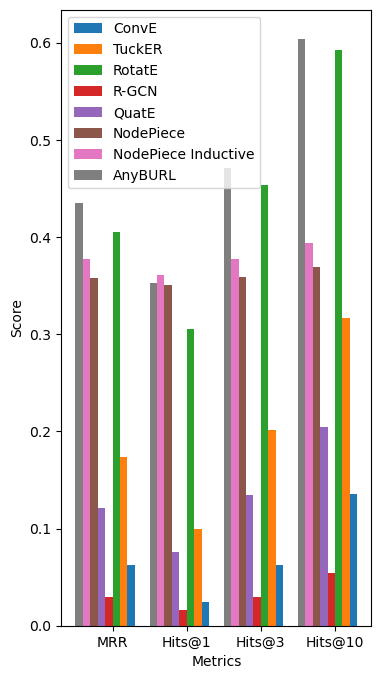

\begin{table}[ht!]
\centering
\caption{Models' both prediction performance on min policy.}
\label{tab:classic_both_min}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &   Hits@10 \\
ConvE               &  0.062926 &  0.023969 &  0.062712 &  0.135779 \\
TuckER              &    0.1733 &  0.099402 &  0.200991 &  0.316283 \\
RotatE              &  0.405389 &  0.304856 &  0.453312 &  0.592751 \\
R-GCN               &  0.029585 &  0.016024 &   0.02995 &  0.054455 \\
QuatE               &  0.121529 &  0.076147 &  0.134708 &  0.204562 \\
NodePiece           &  0.358326 &  0.350964 &  0.358954 &  0.368818 \\
NodePiece Inductive &  0.376959 &  0.361055 &  0.376884 &  0.394221 \\
AnyBURL             &    0.4355 &    0.3523 &    0.4705 &    0.6037 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\gianl\AppData\Local\Temp\ipykernel_12496\1786581200.py:52: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.062926,0.173300,0.405389,0.029585,0.121529,0.005569,0.029950
1,Hits@1,0.023969,0.099402,0.304856,0.016024,0.076147,0.000357,0.012186
2,Hits@3,0.062712,0.200991,0.453312,0.029950,0.134708,0.001428,0.024497
3,Hits@5,0.089091,0.251607,0.516024,0.038431,0.162471,0.007499,0.036307
4,Hits@10,0.135779,0.316283,0.592751,0.054455,0.204562,0.009239,0.049372


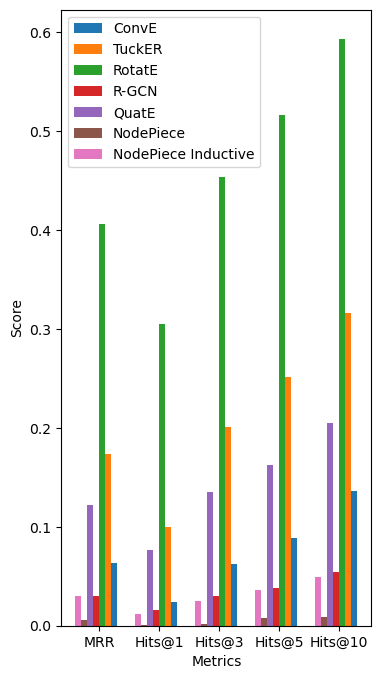

\begin{table}[ht!]
\centering
\caption{Models' both prediction performance on average policy.}
\label{tab:classic_both_average}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.062926 &  0.023969 &  0.062712 &  0.089091 &  0.135779 \\
TuckER              &    0.1733 &  0.099402 &  0.200991 &  0.251607 &  0.316283 \\
RotatE              &  0.405389 &  0.304856 &  0.453312 &  0.516024 &  0.592751 \\
R-GCN               &  0.029585 &  0.016024 &   0.02995 &  0.038431 &  0.054455 \\
QuatE               &  0.121529 &  0.076147 &  0.134708 &  0.162471 &  0.204562 \\
NodePiece           &  0.005569 &  0.000357 &  0.001428 &  0.007499 &  0.009239 \\
NodePiece Inductive &   0.02995 &  0.012186 &  0.024497 &  0.036307 &  0.049372 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\gianl\AppData\Local\Temp\ipykernel_12496\1786581200.py:52: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.062926,0.173300,0.405389,0.029585,0.121529,0.003977,0.027899
1,Hits@1,0.023969,0.099402,0.304856,0.016024,0.076147,0.000357,0.012186
2,Hits@3,0.062712,0.200991,0.453312,0.029950,0.134708,0.000982,0.024246
3,Hits@5,0.089091,0.251607,0.516024,0.038431,0.162471,0.001518,0.027764
4,Hits@10,0.135779,0.316283,0.592751,0.054455,0.204562,0.007990,0.045101


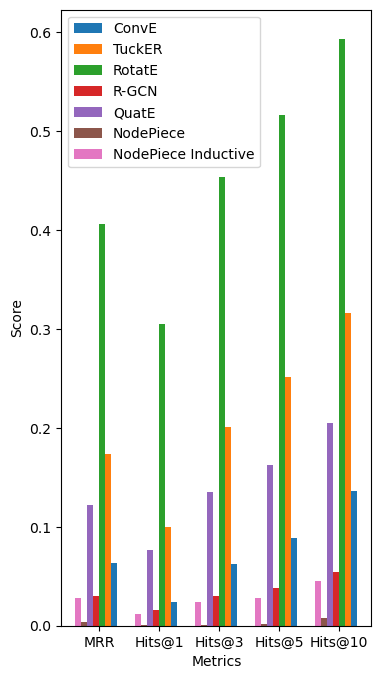

\begin{table}[ht!]
\centering
\caption{Models' both prediction performance on max policy.}
\label{tab:classic_both_max}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.062926 &  0.023969 &  0.062712 &  0.089091 &  0.135779 \\
TuckER              &    0.1733 &  0.099402 &  0.200991 &  0.251607 &  0.316283 \\
RotatE              &  0.405389 &  0.304856 &  0.453312 &  0.516024 &  0.592751 \\
R-GCN               &  0.029585 &  0.016024 &   0.02995 &  0.038431 &  0.054455 \\
QuatE               &  0.121529 &  0.076147 &  0.134708 &  0.162471 &  0.204562 \\
NodePiece           &  0.003977 &  0.000357 &  0.000982 &  0.001518 &   0.00799 \\
NodePiece Inductive &  0.027899 &  0.012186 &  0.024246 &  0.027764 &  0.045101 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\gianl\AppData\Local\Temp\ipykernel_12496\1786581200.py:52: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


In [42]:
for pred_type in ['head','tail','both']:
    for policy in ['optimistic', 'realistic','pessimistic']:
        plot_test_2(pred_type,policy)

In [33]:
def plot_inference_time(information):
#     columns = [
# #         'device', 'parameters bytes','number parameters', 'training duration','training evaluation duration',
# #               'validation evaluation duration','testing evaluation duration','Operating system name',
# #               'Operating system version','Processor architecture','Python version','Processor model name',
# #               'Number cpu cores','Total physical memory','GPU','loss','embedding_dim','learning_rate','optimizer',
#                 'num_epochs','patience'
#               ]
#     columns.remove(information)
    information_df_list = []
    for model_name in model_name_list:
        temp_df = pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
    
    temp_df = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl_information.csv')
    temp_df = temp_df[temp_df['name']==information].rename(columns={'value':'anyburl'}).drop(columns=['Unnamed: 0'],axis=1)
    information_df_list.append(temp_df)
    information_df = information_df_list[0]
    
    for i in range(1, len(information_df_list)):
        information_df = pd.merge(information_df,information_df_list[i],on='name')
    information_df = information_df.drop(columns=['name'],axis=1)
    column_dict = {'convE_transductive': "ConvE", "tuckER_transductive":"TuckER", "rotatE_transductive":"RotatE",
                  "rgcn_transductive":"R-GCN","quatE_transductive":"QuatE","nodepiece_transductive_2":"NodePiece",
                  "nodepiece_inductive_2":"NodePiece Inductive","anyburl_100_transductive":"AnyBURL",
                  'metric':"Metric","anyburl":"AnyBURL"}
    information_df.rename(columns=column_dict,inplace=True)
    display(information_df)
    for column in information_df.columns:
        information_df[column] = information_df[column].astype('float32')
    information_df = information_df/11202 #size of the test set 
    information_df['Mean RT'] = 10.59 * 1e-3
    information_df['Median RT'] = 1e-3
    information_df['NodePiece Inductive'] = information_df['NodePiece Inductive']*11202/3903 #size of inductive test set 
    names = list(information_df)
    information_df = information_df.transpose()
    column = list(information_df)[0]
    information_df = information_df.rename(columns={column:information})
    information_df.rename(columns={"testing evaluation duration":"Testing time per trace (s)"},inplace=True)

#     information_df[information]=information_df[information].astype(float)
#     for elem in names:
#         information_df[elem] = information_df[elem].astype(float)
#     information_df=np.log(information_df)
    display(information_df)
#     information_df.plot()
    plt.figure(figsize=(4, 4))
    plt.bar(names,np.array(information_df["Testing time per trace (s)"]))
#     plt.plot(list(information_df.loc[0]))
#     plt.hist(list(information_df.loc[0]))
    plt.hlines(1e-3,xmin=-0.5,xmax=len(information_df)-0.5,colors="r")
    x_values =names
    plt.xticks(np.arange(0,len(x_values)), x_values, rotation=90)
    plt.title(f'Models\' {information} per trace (s)')
    plt.show()
    
    return information_df

,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive,AnyBURL
0,3.743607759475708,15.446498394012451,9.931920051574707,6.276913404464722,73.2819755077362,6.582700729370117,1.2174043655395508,53.59509992599487


,Testing time per trace (s)
ConvE,0.000334
TuckER,0.001379
RotatE,0.000887
R-GCN,0.000560
QuatE,0.006542
NodePiece,0.000588
NodePiece Inductive,0.000312
AnyBURL,0.004784
Mean RT,0.010590
Median RT,0.001000


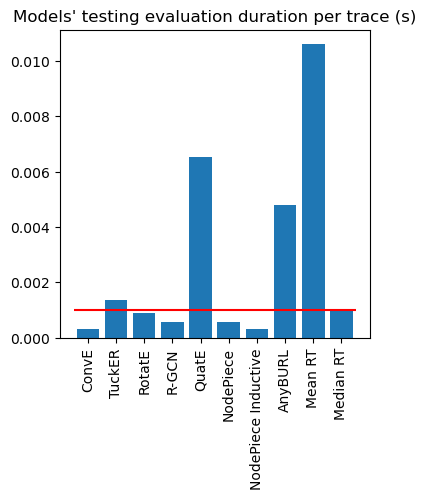

In [34]:
inference_df = plot_inference_time('testing evaluation duration')

In [35]:
def plot_param_bytes(information):
#     columns = [
# #         'device', 'parameters bytes','number parameters', 'training duration','training evaluation duration',
# #               'validation evaluation duration','testing evaluation duration','Operating system name',
# #               'Operating system version','Processor architecture','Python version','Processor model name',
# #               'Number cpu cores','Total physical memory','GPU','loss','embedding_dim','learning_rate','optimizer',
#                 'num_epochs','patience'
#               ]
#     columns.remove(information)
    information_df_list = []
    for model_name in model_name_list:
        temp_df = pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
    
    temp_df = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl_information.csv')
    temp_df = temp_df[temp_df['name']==information].rename(columns={'value':'anyburl'}).drop(columns=['Unnamed: 0'],axis=1)
    information_df_list.append(temp_df)
    information_df = information_df_list[0]
    
    for i in range(1, len(information_df_list)):
        information_df = pd.merge(information_df,information_df_list[i],on='name')
    information_df = information_df.drop(columns=['name'],axis=1)
    column_dict = {'convE_transductive': "ConvE", "tuckER_transductive":"TuckER", "rotatE_transductive":"RotatE",
                  "rgcn_transductive":"R-GCN","quatE_transductive":"QuatE","nodepiece_transductive_2":"NodePiece",
                  "nodepiece_inductive_2":"NodePiece Inductive","anyburl_100_transductive":"AnyBURL",
                  'metric':"Metric","anyburl":"AnyBURL"}
    information_df.rename(columns=column_dict,inplace=True)
    display(information_df)
    for column in information_df.columns:
        information_df[column] = information_df[column].astype('float32')
#     information_df = information_df/11202 #size of the test set 
#     information_df['Mean RT'] = 10.59 * 1e-3
#     information_df['Median RT'] = 1e-3
#     information_df['NodePiece Inductive'] = information_df['NodePiece Inductive']*11202/3903 #size of inductive test set 
    names = list(information_df)
    information_df = information_df.transpose()
    column = list(information_df)[0]
    information_df = information_df.rename(columns={column:information})
    information_df.rename(columns={information:"Memory usage (B)"},inplace=True)

#     information_df[information]=information_df[information].astype(float)
#     for elem in names:
#         information_df[elem] = information_df[elem].astype(float)
#     information_df=np.log(information_df)
    display(information_df)
#     information_df.plot()
    plt.figure(figsize=(4, 4))
    plt.bar(names,np.array(information_df["Memory usage (B)"]))
#     plt.plot(list(information_df.loc[0]))
#     plt.hist(list(information_df.loc[0]))
    x_values =names
    plt.xticks(np.arange(0,len(x_values)), x_values, rotation=90)
    plt.title(f'Models\' Memory usage (B)')
    plt.show()
    
    return information_df

,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive,AnyBURL
0,21700172,45333600,26660800,15572288,53321600,972800,6732800,1000000000.0


,Memory usage (B)
ConvE,2.170017e+07
TuckER,4.533360e+07
RotatE,2.666080e+07
R-GCN,1.557229e+07
QuatE,5.332160e+07
NodePiece,9.728000e+05
NodePiece Inductive,6.732800e+06
AnyBURL,1.000000e+09


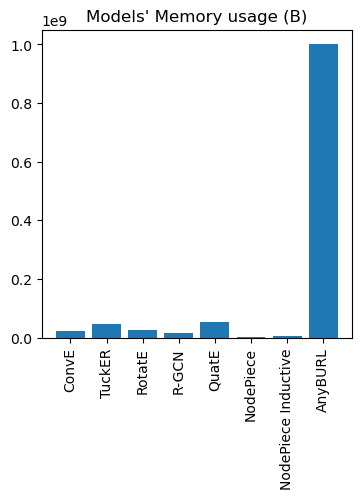

In [36]:
mem_df = plot_param_bytes('parameters bytes')

In [37]:
def plot_training_duration(information):
#     columns = [
# #         'device', 'parameters bytes','number parameters', 'training duration','training evaluation duration',
# #               'validation evaluation duration','testing evaluation duration','Operating system name',
# #               'Operating system version','Processor architecture','Python version','Processor model name',
# #               'Number cpu cores','Total physical memory','GPU','loss','embedding_dim','learning_rate','optimizer',
#                 'num_epochs','patience'
#               ]
#     columns.remove(information)
    information_df_list = []
    for model_name in model_name_list:
        temp_df = pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
    
    temp_df = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl_information.csv')
    temp_df = temp_df[temp_df['name']==information].rename(columns={'value':'anyburl'}).drop(columns=['Unnamed: 0'],axis=1)
    information_df_list.append(temp_df)
    information_df = information_df_list[0]
    
    for i in range(1, len(information_df_list)):
        information_df = pd.merge(information_df,information_df_list[i],on='name')
    information_df = information_df.drop(columns=['name'],axis=1)
    column_dict = {'convE_transductive': "ConvE", "tuckER_transductive":"TuckER", "rotatE_transductive":"RotatE",
                  "rgcn_transductive":"R-GCN","quatE_transductive":"QuatE","nodepiece_transductive_2":"NodePiece",
                  "nodepiece_inductive_2":"NodePiece Inductive","anyburl_100_transductive":"AnyBURL",
                  'metric':"Metric","anyburl":"AnyBURL"}
    information_df.rename(columns=column_dict,inplace=True)
    display(information_df)
    for column in information_df.columns:
        information_df[column] = information_df[column].astype('float32')
#     information_df = information_df/11202 #size of the test set 
#     information_df['Mean RT'] = 10.59 * 1e-3
#     information_df['Median RT'] = 1e-3
#     information_df['NodePiece Inductive'] = information_df['NodePiece Inductive']*11202/3903 #size of inductive test set 
    names = list(information_df)
    information_df = information_df.transpose()
    column = list(information_df)[0]
    information_df = information_df.rename(columns={column:information})
    information_df.rename(columns={information:"Training duration (s)"},inplace=True)

#     information_df[information]=information_df[information].astype(float)
#     for elem in names:
#         information_df[elem] = information_df[elem].astype(float)
#     information_df=np.log(information_df)
    display(information_df)
#     information_df.plot()
    plt.figure(figsize=(4, 4))
    plt.bar(names,np.array(information_df["Training duration (s)"]))
#     plt.plot(list(information_df.loc[0]))
#     plt.hist(list(information_df.loc[0]))
    x_values =names
    plt.xticks(np.arange(0,len(x_values)), x_values, rotation=90)
    plt.title(f'Models\' Training duration (s)')
    plt.show()
    
    return information_df

,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive,AnyBURL
0,152.30735683441162,2184.6410613059998,1083.5213296413422,162.5621702671051,5897.1808824539185,249.5512342453003,72.85673785209656,100


,Training duration (s)
ConvE,152.307358
TuckER,2184.641113
RotatE,1083.521362
R-GCN,162.562164
QuatE,5897.180664
NodePiece,249.551239
NodePiece Inductive,72.856735
AnyBURL,100.000000


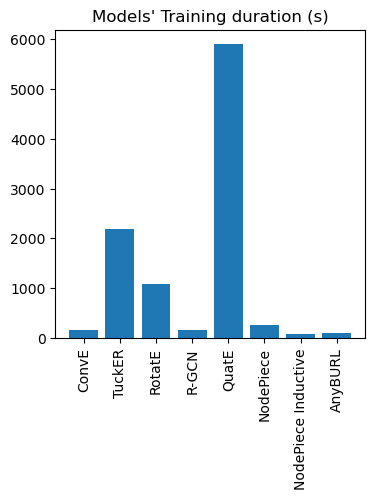

In [38]:
training_df = plot_training_duration('training duration')

In [39]:
pd.concat([inference_df,mem_df,training_df],axis=1)

,Testing time per trace (s),Memory usage (B),Training duration (s)
ConvE,0.000334,2.170017e+07,152.307358
TuckER,0.001379,4.533360e+07,2184.641113
RotatE,0.000887,2.666080e+07,1083.521362
R-GCN,0.000560,1.557229e+07,162.562164
QuatE,0.006542,5.332160e+07,5897.180664
NodePiece,0.000588,9.728000e+05,249.551239
NodePiece Inductive,0.000312,6.732800e+06,72.856735
AnyBURL,0.004784,1.000000e+09,100.000000
Mean RT,0.010590,NaN,NaN
Median RT,0.001000,NaN,NaN


In [40]:
print(pd.concat([inference_df,mem_df,training_df],axis=1).to_latex( #hrules=True,
                                   label = f'tab:additional_requirements',
                                   caption = f'Models additional requirements performance.',
                                   #clines = "all;data",
                                   position="ht!",
                                   #position_float="centering",
                                   column_format="p{0.23\\textwidth} p{0.23\\textwidth} p{0.23\\textwidth} p{0.23\\textwidth}",
#                                    index = True,
                                   header =True,
                                   na_rep="-"
#                                    bold_rows=True
    )
     )                             

\begin{table}[ht!]
\centering
\caption{Models additional requirements performance.}
\label{tab:additional_requirements}
\begin{tabular}{p{0.23\textwidth} p{0.23\textwidth} p{0.23\textwidth} p{0.23\textwidth}}
\toprule
{} &  Testing time per trace (s) &  Memory usage (B) &  Training duration (s) \\
\midrule
ConvE               &                    0.000334 &      2.170017e+07 &             152.307358 \\
TuckER              &                    0.001379 &      4.533360e+07 &            2184.641113 \\
RotatE              &                    0.000887 &      2.666080e+07 &            1083.521362 \\
R-GCN               &                    0.000560 &      1.557229e+07 &             162.562164 \\
QuatE               &                    0.006542 &      5.332160e+07 &            5897.180664 \\
NodePiece           &                    0.000588 &      9.728000e+05 &             249.551239 \\
NodePiece Inductive &                    0.000312 &      6.732800e+06 &              72.856735 \\
AnyBUR

C:\Users\gianl\AppData\Local\Temp\ipykernel_12496\1120204021.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([inference_df,mem_df,training_df],axis=1).to_latex( #hrules=True,
